In [1]:
from pathlib import Path

root_folder = Path.cwd()

In [2]:
%matplotlib inline
import torch
from torch.utils.tensorboard import SummaryWriter
torch.cuda.empty_cache()

In [3]:
from IPython.display import Image, clear_output 
print('PyTorch %s %s' % (torch.__version__, torch.cuda.get_device_properties(0) if torch.cuda.is_available() else 'CPU'))

PyTorch 1.5.0 _CudaDeviceProperties(name='GeForce GTX 1080 Ti', major=6, minor=1, total_memory=11178MB, multi_processor_count=28)


In [4]:
import torch
cuda_check = torch.cuda.is_available()
device = torch.device("cuda:0" if cuda_check else "cpu")
print(device)

cuda:0


In [5]:
from torchvision.transforms import transforms
from torchvision.transforms import ColorJitter

transform = transforms.Compose([
                                #transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.2),
                                transforms.ToTensor(),
])

In [6]:
from torchvision.transforms import transforms
from pathlib import Path
data_folder = root_folder / 'data'
train_folder = data_folder / 'train'
test_folder = data_folder / 'test1'
validate_folder = data_folder / 'validate'
weights_folder = data_folder / 'weights'
print(train_folder)

/workspace/Assignment-15/data/train


In [7]:
import data_producer as dp
import model as md
import train
import test
import validate
import visualize as viz
import newmodel as nm

In [8]:
train_set = dp.DataProducer(train_folder, transform)
#test_set = dp.DataProducer(test_folder, transform)
validate_set = dp.DataProducer(validate_folder, transform)

In [9]:
from torch.utils.data import DataLoader
train_dl = DataLoader(train_set, batch_size=256, shuffle= True, num_workers = 6)
#test_dl = DataLoader(test_set, batch_size=16, shuffle= True,num_workers = 6)
validate_dl = DataLoader(validate_set, batch_size=256, shuffle= True, num_workers = 6)

In [10]:
writer = SummaryWriter('runs')

In [11]:
import torch.nn as nn
#criterion = nn.SmoothL1Loss()
criterion = nn.BCEWithLogitsLoss()

In [12]:
# = md.R2U_Net()
# torch.cuda.clear_memory_allocated()  # entirely clear all allocated memory
# model = model.to(device)
model = nm.Net()
model = model.to(device)

In [28]:
from torchsummary import summary
summary(model, input_size=(3,64,64))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 64, 64]             896
              ReLU-2           [-1, 32, 64, 64]               0
       BatchNorm2d-3           [-1, 32, 64, 64]              64
           Dropout-4           [-1, 32, 64, 64]               0
            Conv2d-5           [-1, 32, 64, 64]           9,248
              ReLU-6           [-1, 32, 64, 64]               0
       BatchNorm2d-7           [-1, 32, 64, 64]              64
           Dropout-8           [-1, 32, 64, 64]               0
            Conv2d-9           [-1, 32, 64, 64]           9,248
             ReLU-10           [-1, 32, 64, 64]               0
      BatchNorm2d-11           [-1, 32, 64, 64]              64
          Dropout-12           [-1, 32, 64, 64]               0
           Conv2d-13           [-1, 64, 64, 64]           2,112
             ReLU-14           [-1, 64,

In [13]:
model.load_state_dict(torch.load('data/weights/epoch-400weights.pth'))

<All keys matched successfully>

In [14]:
optim = torch.optim.SGD(model.parameters(), lr = 0.01, momentum=.9, weight_decay=1e-5)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Outshape torch.Size([256, 1, 64, 64])  orginial Shape  torch.Size([256, 1, 64, 64])


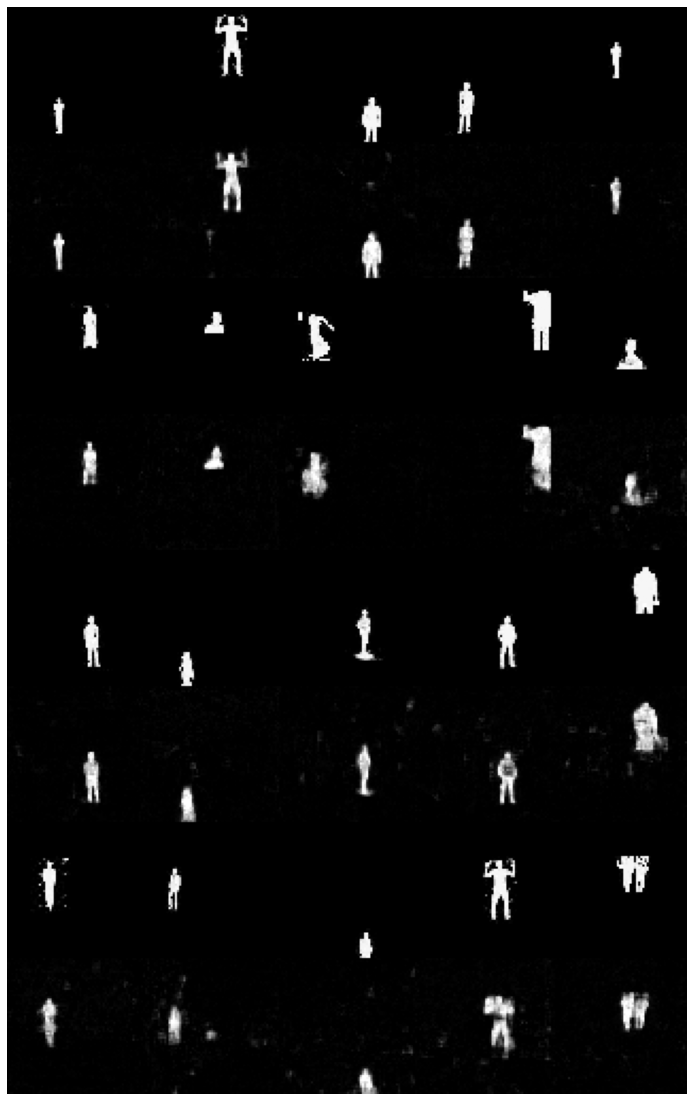

In [15]:
validate.validate(model, criterion, device, validate_dl)

In [ ]:
import torch, gc
gc.collect()
torch.cuda.empty_cache()

In [ ]:
# from torch.optim.lr_scheduler import ReduceLROnPlateau

# scheduler = ReduceLROnPlateau(optim, 'min', )

# for epoch in range(1,10):
#   train.train(model, criterion, device, train_dl, optim, epoch)
#   val_loss = validate(model, criterion, device, validate_dl)
#   print(val_loss)
#   scheduler.step(val_loss)
#   if epoch % 50 == 0:
#     file_name = str(weights_folder) + 'epoch-' + str(epoch) + 'weights.pth'
#     torch.save(model.state_dict(), file_name)

In [ ]:
import time

for epoch in range(1,3):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch,writer)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'weights.pth'
    torch.save(model.state_dict(), file_name)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  1 -- Time Taken -  789.1961896419525


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  2 -- Time Taken -  640.3667869567871


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  3 -- Time Taken -  459.6969516277313


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  4 -- Time Taken -  450.92374205589294


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  5 -- Time Taken -  496.02868008613586


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  6 -- Time Taken -  502.10214829444885


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  7 -- Time Taken -  507.4435131549835


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  8 -- Time Taken -  504.6109402179718


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  9 -- Time Taken -  480.1325795650482


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  10 -- Time Taken -  450.49183106422424


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  11 -- Time Taken -  467.4319350719452


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  12 -- Time Taken -  467.2431104183197


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  13 -- Time Taken -  469.0995743274689


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  14 -- Time Taken -  460.2265498638153


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  15 -- Time Taken -  465.54684019088745


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  16 -- Time Taken -  480.03991651535034


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  17 -- Time Taken -  487.08321738243103


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  18 -- Time Taken -  471.9244034290314


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  19 -- Time Taken -  478.5012996196747


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  20 -- Time Taken -  481.33987760543823


/workspace/Assignment-15/visualize.py:13: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(15, 20))
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  21 -- Time Taken -  498.608110666275


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  22 -- Time Taken -  492.8706178665161


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  23 -- Time Taken -  522.0974934101105


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  24 -- Time Taken -  520.9181909561157


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  25 -- Time Taken -  523.4854648113251


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  26 -- Time Taken -  537.6427183151245


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  27 -- Time Taken -  573.3324587345123


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  28 -- Time Taken -  661.1852667331696


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  29 -- Time Taken -  749.1672775745392


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  30 -- Time Taken -  773.9849104881287


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  31 -- Time Taken -  647.375082731247


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  32 -- Time Taken -  499.25284600257874


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  33 -- Time Taken -  509.2447953224182


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  34 -- Time Taken -  519.2211945056915


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  35 -- Time Taken -  618.8373034000397


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  36 -- Time Taken -  648.5613694190979


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  37 -- Time Taken -  597.3823926448822


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Epoch -  38 -- Time Taken -  630.2519652843475


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


In [ ]:
from torch.optim.lr_scheduler import StepLR

scheduler = StepLR(optim, step_size = 50, gamma=0.1, last_epoch=-1)

for epoch in range(11,105):
  start = time.time()
  train.train(model, criterion, device, train_dl, optim, epoch)
  end = time.time()
  print('Epoch - ', str(epoch), '-- Time Taken - ', str(end - start) )
  # val_loss = validate(model, criterion, device, validate_dl)
  # print(val_loss)
  scheduler.step()
  if epoch % 10 == 0:
    file_name = str(weights_folder) + '/epoch-' + str(epoch) + 'weights.pth'
    torch.save(model.state_dict(), file_name)

In [ ]:
file_name = str(weights_folder) + '/epoch-' + str(10) + 'weights.pth'

In [ ]:
file_name

In [15]:
import numpy as np
import skimage

In [16]:
writer.add_graph(model)
#writer.close()

TypeError: 'NoneType' object is not iterable